# SIC PROJECT

## Attribute Information

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
0: Nothing to note,
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat,
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
13. thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### STEP 1) IMPORTING LIBRARIES

In [770]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### STEP 2) READING DATA

In [771]:
data=pd.read_csv(r"C:\Users\111\Desktop\SIC\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### As the dataset has the output variable in terms of 1 and 0 hence it is a supervised classification problem

### STEP 3) EDA

### 3.1) CHECKING SHAPE OF DATA

In [772]:
data.shape

(1025, 14)

### 3.2) MISSING VALUES CHECK

In [773]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [774]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### No missing values found

### 3.3) DATA TYPE CHECK

In [775]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Data types are okay and good to go with

### 3.4) DUPLICATE VALUES CHECK

In [776]:
data_duplicatevalues=data.duplicated()
print(data_duplicatevalues.sum())
data[data_duplicatevalues]

723


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### There is a high possibility of duplicate values so no further analysis would be necessary

### 3.5) CHARACTERISTICS OF DATA

In [777]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [778]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 3.6) UNIQUE VALUES CHECK

In [779]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [780]:
data["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [781]:
data["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

#### According to the documentation provided Thal has 3 values(0,1,2) and ca has 4 values(0,1,2,3) however the datasets shows Thal has an extra value of (3) and ca has an extra value of (4).We will be dropping the columns corresponding to these rows.

In [782]:
data_copy=data.copy()

In [783]:
data_copy.drop(data_copy[(data_copy['thal'] ==3) | (data_copy['ca'] ==4)].index, inplace=True)                   

In [784]:
data_copy.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1


In [785]:
data_copy["ca"].unique()

array([3, 0, 2, 1], dtype=int64)

In [786]:
data_copy["thal"].unique()

array([2, 1, 0], dtype=int64)

In [787]:
data_copy.shape

(604, 14)

#### We can see that dropping the rows reduced the dataset to 50 percent of the original size. So it would therefore be better to remove the columns instead(thal and ca) that have extra values

In [788]:
data.drop(['ca', 'thal'], axis=1,inplace=True)

In [789]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,52,1,0,125,212,0,1,168,0,1.0,2,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,0
4,62,0,0,138,294,1,1,106,0,1.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,1


#### We have now cleaned the data from irrelevant records

### STEP 4) BINNING

#### Now in order to prepare data for visualization and model training we place the numerical data into bins

### 4.1) Age

In [790]:
data['age'].nunique()

41

In [791]:
a=data['age'].unique()
print(sorted(a))

[29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77]


In [792]:
def AGE(val):
    if val <= 44:     
        return "0"
    elif (val>44)&(val<=54):           
        return "1"
    elif (val>54)&(val<=64):           
        return "2"
    else:
        return "3"

data["age"] = data["age"].apply(AGE)

### 4.2) Trestbps

In [793]:
data['trestbps'].nunique()

49

In [794]:
a=data['trestbps'].unique()
print(sorted(a))

[94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117, 118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156, 160, 164, 165, 170, 172, 174, 178, 180, 192, 200]


In [795]:
def TRESTBPS(val):
    if val <= 110:     
        return "0"
    elif (val>110)&(val<=125):           
        return "1"
    elif (val>125)&(val<=140):           
        return "2"
    elif (val>140)&(val<=156):           
        return "3"
    else:
        return "4"

data["trestbps"] = data["trestbps"].apply(TRESTBPS)

### 4.3) Chol

In [796]:
data['chol'].nunique()

152

In [797]:
a=data['chol'].unique()
print(sorted(a))

[126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277, 278, 281, 282, 283, 284, 286, 288, 289, 290, 293, 294, 295, 298, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 311, 313, 315, 318, 319, 321, 322, 325, 326, 327, 330, 335, 340, 341, 342, 353, 354, 360, 394, 407, 409, 417, 564]


In [798]:
def CHOL(val):
    if val <= 199:     
        return "0"
    elif (val>199)&(val<=230):           
        return "1"
    elif (val>230)&(val<=262):           
        return "2"
    elif (val>262)&(val<=302):           
        return "3"
    else:
        return "4"

data["chol"] = data["chol"].apply(CHOL)

### 4.4) Thalach

In [799]:
data['thalach'].nunique()

91

In [800]:
a=data['thalach'].unique()
print(sorted(a))

[71, 88, 90, 95, 96, 97, 99, 103, 105, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 190, 192, 194, 195, 202]


In [801]:
def THALACH(val):
    if val <= 117:     
        return "0"
    elif (val>117)&(val<=137):           
        return "1"
    elif (val>137)&(val<=155):           
        return "2"
    elif (val>155)&(val<=173):           
        return "3"
    else:
        return "4"

data["thalach"] = data["thalach"].apply(THALACH)

### 4.5) Oldpeak

In [802]:
data['oldpeak'].nunique()

40

In [803]:
a=data['oldpeak'].unique()
print(sorted(a))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.8, 2.9, 3.0, 3.1, 3.2, 3.4, 3.5, 3.6, 3.8, 4.0, 4.2, 4.4, 5.6, 6.2]


In [804]:
def OLDPEAK(val):
    if val <= 0.9:     
        return "0"
    elif (val>0.9)&(val<=2.0):           
        return "1"
    elif (val>2.0)&(val<=3.0):           
        return "2"
    else:
        return "3"

data["oldpeak"] = data["oldpeak"].apply(OLDPEAK)

#### This is the categorized and cleaned data

In [805]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,1,1,0,1,1,0,1,3,0,1,2,0
1,1,1,0,2,1,1,0,2,1,3,0,0
2,3,1,0,3,0,0,1,1,1,2,0,0
3,2,1,0,3,1,0,1,3,0,0,2,0
4,2,0,0,2,3,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,2,1,1,2,1,0,1,3,1,0,2,1
1021,2,1,0,1,2,0,0,2,1,2,1,0
1022,1,1,0,0,3,0,0,1,1,1,1,0
1023,1,0,0,0,2,0,0,3,0,0,2,1


### STEP 5) VISUALIZATION

### 1) Chest Pain Analysis

### 1.1) Analysis between types of chest pain

In [68]:
data["cp"].agg(["value_counts"])

,value_counts
0,497
2,284
1,167
3,77


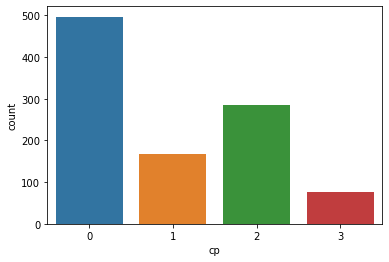

In [69]:
sns.countplot(x = data["cp"]);

#### Chest pain represented by 0 is most common

### 1.2) Analysis of chest pain between male and female

In [70]:
data.groupby("sex")["cp"].agg(["value_counts"])

value_counts
sex cp              
0   0            133
    2            109
    1             57
    3             13
1   0            364
    2            175
    1            110
    3             64

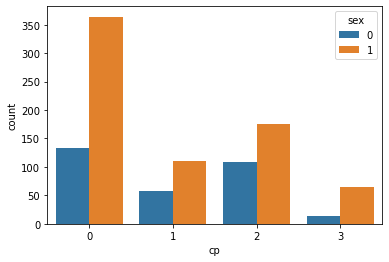

In [71]:
sns.countplot(x = "cp", data = data, hue = "sex");

#### More male suffer from chest pain as compared to female

### 2) Fasting Blood Sugar Analysis

In [810]:
data.groupby(["sex"])["fbs"].agg(["value_counts"])

value_counts
sex fbs              
0   0             270
    1              42
1   0             602
    1             111

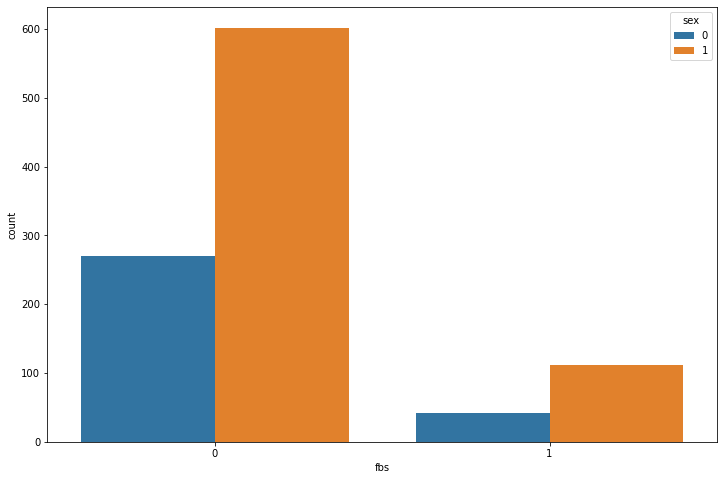

In [811]:
sns.countplot(x = "fbs", data = data, hue = "sex");

#### The above graph shows that females have lower fasting glucose than males

### 3) Rest Blood Pressure Analysis between Male and Female

In [82]:
data.groupby(["sex"])["trestbps"].agg(["value_counts"])

value_counts
sex trestbps              
0   2                  137
    1                   59
    0                   41
    3                   41
    4                   34
1   2                  266
    1                  216
    0                   89
    3                   88
    4                   54

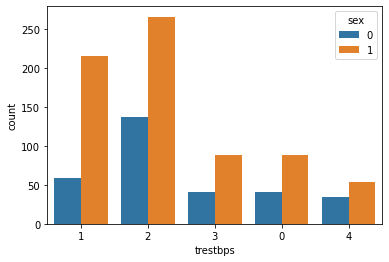

In [84]:
sns.countplot(x = "trestbps", data = data, hue = "sex");

#### Males have high Resting Blood Pressure
##### 0,1,2 are Normal
##### 3,4 are concerning

### 4) Cholestrol Analysis between Male and Female

In [98]:
data.groupby(["sex"])["chol"].agg(["value_counts"])

value_counts
sex chol              
0   4               76
    3               72
    1               63
    2               56
    0               45
1   2              196
    1              194
    3              135
    0              124
    4               64

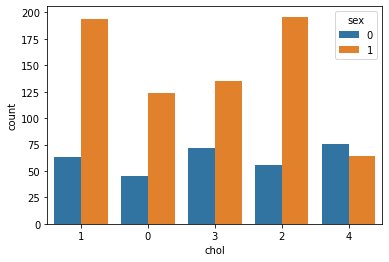

In [89]:
sns.countplot(x = "chol", data = data, hue = "sex");

#### 0 is Normal
#### 1- 4 are concerning in order of precidence

### 5) Resting ECG Analysis between Male and Female

In [91]:
data.groupby(["sex"])["restecg"].agg(["value_counts"])

value_counts
sex restecg              
0   1                 157
    0                 144
    2                  11
1   1                 356
    0                 353
    2                   4

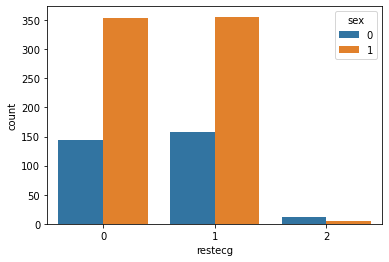

In [96]:
sns.countplot(x = "restecg", data = data, hue = "sex");

#### More Male have Normal Rest BP & More Female have higher rest BP 
##### 0: Normal 
##### 1:  Wave abnormality (can range from mild symptoms to severe problems signals non-normal heart beat)
##### 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber

### 6) Maximum Heart Rate Analysis between Male and Female

In [100]:
data.groupby(["sex"])["thalach"].agg(["value_counts"])

value_counts
sex thalach              
0   3                 133
    2                  81
    1                  45
    0                  30
    4                  23
1   3                 202
    2                 201
    1                 121
    4                 104
    0                  85

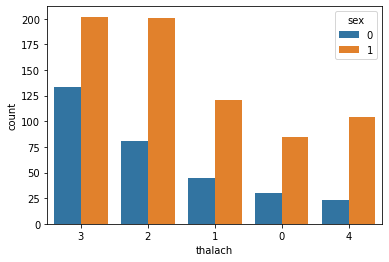

In [102]:
sns.countplot(x = "thalach", data = data, hue = "sex");

#### More Male achieve maximum heart rate

### 7) Analysis of exercise enduced angina between Male and Female

In [104]:
data.groupby(["sex"])["exang"].agg(["value_counts"])

value_counts
sex exang              
0   0               238
    1                74
1   0               442
    1               271

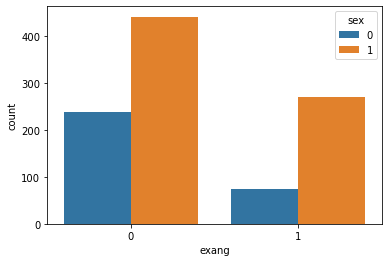

In [105]:
sns.countplot(x = "exang", data = data, hue = "sex");

#### Male are more at risk for exercise enduced angina than female

### 8) Analysis of oldpeak in Male and Female

In [106]:
data.groupby(["sex"])["oldpeak"].agg(["value_counts"])

value_counts
sex oldpeak              
0   0                 183
    1                  96
    3                  19
    2                  14
1   0                 365
    1                 203
    2                  91
    3                  54

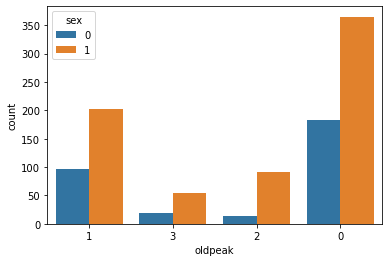

In [107]:
sns.countplot(x = "oldpeak", data = data, hue = "sex");

#### ST depression is more common in ECG of male than female 

### 9) Analysis of slope in Male and Female

In [111]:
data.groupby(["sex"])["slope"].agg(["value_counts"])

value_counts
sex slope              
0   1               150
    2               145
    0                17
1   1               332
    2               324
    0                57

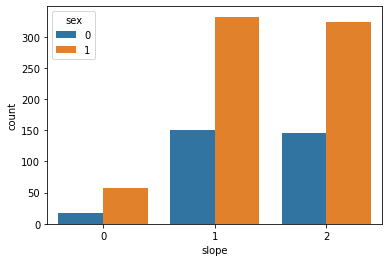

In [110]:
sns.countplot(x = "slope", data = data, hue = "sex");

#### slope of peak exerecise is more common in ECG of male than female 

### 10) Heart Disease  vs Age Analysis


<AxesSubplot:xlabel='age', ylabel='Count'>

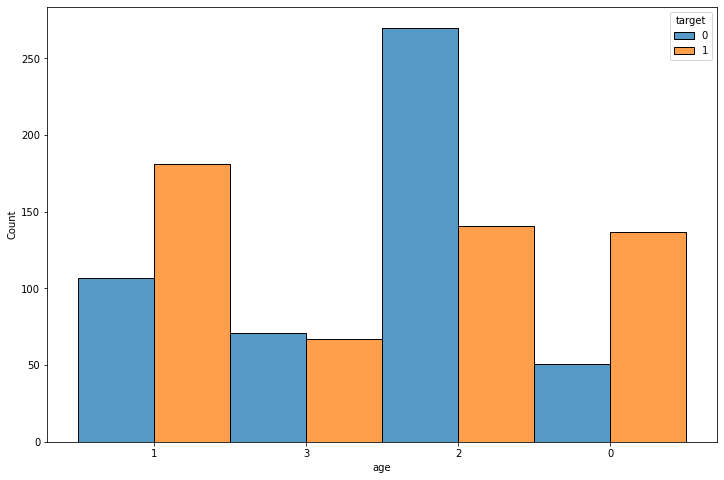

In [812]:
sns.histplot(data = data, x = "age", hue = "target", multiple = "dodge")

#### The above graph shows that individuals having age between 55 - 64 have high possibility to have a heart diease

### 11) Heart Disease vs Sex Analaysis

In [813]:
data.groupby("sex")["target"].agg(["value_counts"])

value_counts
sex target              
0   1                226
    0                 86
1   0                413
    1                300

<AxesSubplot:xlabel='sex', ylabel='Count'>

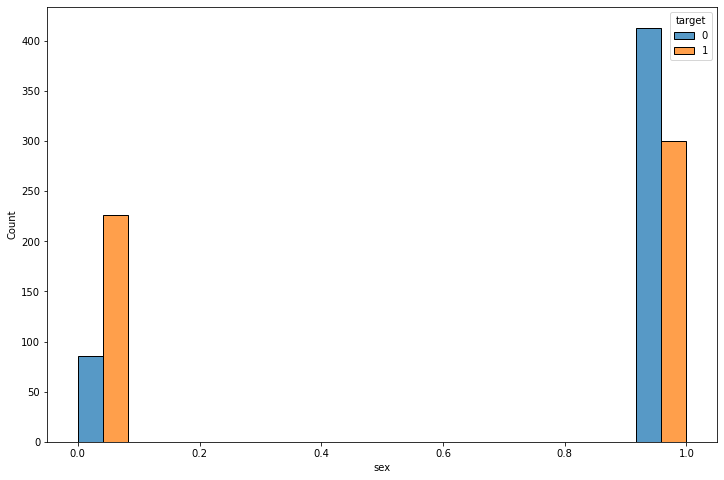

In [814]:
sns.histplot(data = data, x = "sex", hue = "target", multiple="dodge")

#### The above graph shows that males are highy affected to heart disease than females

### 12) Analysis of Chest Pain and Heart Disease

In [120]:
data.groupby(["cp"])["target"].agg(["value_counts"])

value_counts
cp target              
0  0                375
   1                122
1  1                134
   0                 33
2  1                219
   0                 65
3  1                 51
   0                 26

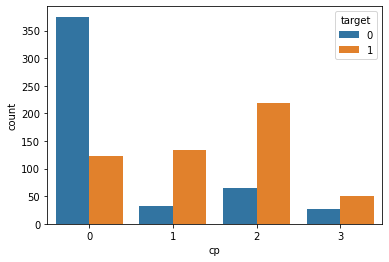

In [123]:
sns.countplot(x = "cp", data = data, hue = "target");

### 13) Analysis of Rest BP and Heart Disease

In [125]:
data.groupby(["trestbps"])["target"].agg(["value_counts"])

value_counts
trestbps target              
0        1                 76
         0                 54
1        1                145
         0                130
2        1                220
         0                183
3        0                 73
         1                 56
4        0                 59
         1                 29

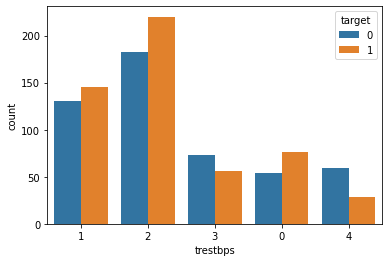

In [127]:
sns.countplot(x = "trestbps", data = data, hue = "target");

#### Male usually have high chances of Heart Disease even with less BP

### 14) Analysis of Cholesterol and Heart Disease

In [130]:
data.groupby(["chol"])["target"].agg(["value_counts"])

value_counts
chol target              
0    1                 99
     0                 70
1    1                145
     0                112
2    1                134
     0                118
3    0                124
     1                 83
4    0                 75
     1                 65

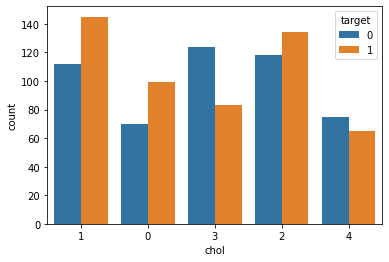

In [132]:
sns.countplot(x = "chol", data = data, hue = "target");

#### People with cholesterol between 199 & 262 have highest chances of heart disease

### 15) Analysis of Fasting Blood Sugar and Heart Disease

In [136]:
data.groupby(["fbs"])["target"].agg(["value_counts"])

value_counts
fbs target              
0   1                455
    0                417
1   0                 82
    1                 71

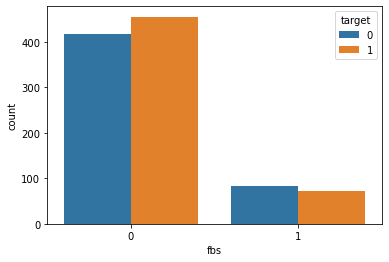

In [144]:
sns.countplot(x = "fbs", data = data, hue = "target");

#### Female with high fasting blood sugar have high risk of heart disease than Male with high fasting blood sugar

### 16) Analysis of rest ECG and Heart Disease

In [140]:
data.groupby(["restecg"])["target"].agg(["value_counts"])

value_counts
restecg target              
0       0                283
        1                214
1       1                309
        0                204
2       0                 12
        1                  3

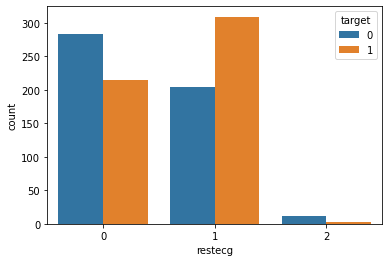

In [142]:
sns.countplot(x = "restecg", data = data, hue = "target");

#### Female with high rest ECG have more chances of heart disease than male with high rest ECG

### 17) Analysis of thalach and Heart Disease

In [141]:
data.groupby(["thalach"])["target"].agg(["value_counts"])

value_counts
thalach target              
0       0                 94
        1                 21
1       0                120
        1                 46
2       0                150
        1                132
3       1                221
        0                114
4       1                106
        0                 21

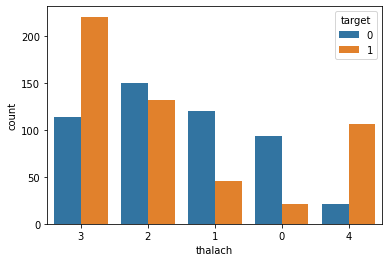

In [143]:
sns.countplot(x = "thalach", data = data, hue = "target");

#### People with thalach more than 173 are at highest risk of heart disease

### 18) Analysis of exercise enduced angina and Heart Disease

In [145]:
data.groupby(["exang"])["target"].agg(["value_counts"])

value_counts
exang target              
0     1                455
      0                225
1     0                274
      1                 71

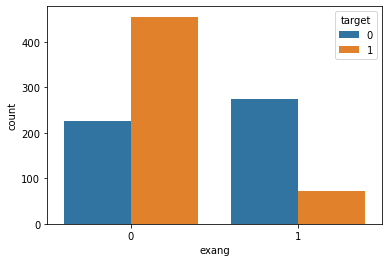

In [146]:
sns.countplot(x = "exang", data = data, hue = "target");

#### Female with exercise enduced angina have higher chance of Heart Disease than male

### STEP 6) FEATURE SELECTION

### 6.1) Coorelation Matrix

<AxesSubplot:>

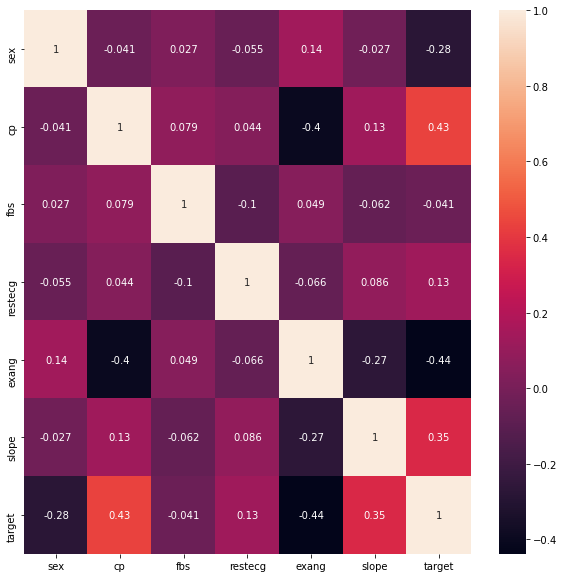

In [815]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data.corr(),annot=True)

#### Since coorelation matrix does not consider the binned columns (age,trestbps,chol,thalach,oldpeak) so we apply significance in determing target Chi-Square test below to find out their. However it can be seen that fbs is being eliminated due to being extremely weak correlated with target

### 6.2) Chi-Square

In [816]:
X = data.drop(["target"], axis = 1)
y = data["target"]

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]
selected_variables

['oldpeak',
 'cp',
 'exang',
 'thalach',
 'age',
 'slope',
 'sex',
 'chol',
 'restecg',
 'trestbps']

In [817]:
summary_stats

,input_variable,p_value,chi2_score
9,oldpeak,1.790769e-52,232.395022
2,cp,2.698064e-49,217.823922
8,exang,3.232318e-30,130.470927
7,thalach,2.745548e-25,107.957855
0,age,1.438409e-09,36.616072
10,slope,6.516763e-09,33.673948
1,sex,7.934661e-07,24.373650
4,chol,7.096507e-04,11.463799
6,restecg,1.803654e-03,9.739343
3,trestbps,2.311899e-03,9.283796


#### Considering p_value,chi2_score and correlation we can feed the model with the above columns except for fbs which is weak coorelated,has non significant p value and less chi2_score

### Dropping fbs column 

In [818]:
data.drop(['fbs'], axis=1,inplace=True)

### STEP 7) MODEL SELECTION

### 7.1) Taking out score data

In [819]:
data_score = data.sample(frac=0.05)
data_11=data_score[['thalach','oldpeak','age','exang','cp','chol','sex','slope','trestbps','restecg']]
data_22=data_score['target']

In [820]:
data_score.shape

(51, 11)

### 7.2) Splitting data in train and test

In [821]:
data_1=data[['thalach','oldpeak','age','exang','cp','chol','sex','slope','trestbps','restecg']]
data_2=data['target']
data_train, data_test, label_train, label_test = train_test_split(data_1, data_2, test_size = 0.3, random_state = 50)

### 7.3) Applying Models

### 7.3.1) KNN

In [822]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model=KNeighborsClassifier(n_neighbors=2).fit(data_train,label_train)
model_train = model.score(data_train, label_train)
print("Training score: ",model_train)
model_test = model.score(data_test, label_test)
print("Testing score: ",model_test)


Training score:  0.9832635983263598
Testing score:  0.9025974025974026


### 7.3.2) SVM

In [823]:
from sklearn.svm import SVC
model = SVC().fit(data_train, label_train)
model_train1 = model.score(data_train, label_train)
print("Training score: ",model_train1)
model_test1 = model.score(data_test, label_test)
print("Testing score: ",model_test1)

Training score:  0.8884239888423989
Testing score:  0.8603896103896104


### 7.3.3) LogisticRegression

In [824]:
from sklearn.linear_model import LogisticRegression 
model =LogisticRegression(solver='liblinear') .fit(data_train,label_train) 
model_train2 = model.score(data_train, label_train)
print("Training score: ",model_train2)
model_test2 = model.score(data_test, label_test)
print("Testing score: ",model_test2)


Training score:  0.8270571827057183
Testing score:  0.7857142857142857


### 7.3.4) DecisionTree

In [825]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=1, max_depth=3).fit(data_train, label_train)
model_train3 = model.score(data_train, label_train)
print("Training score: ",model_train3)
model_test3 = model.score(data_test, label_test)
print("Testing score: ",model_test3)

Training score:  0.8298465829846583
Testing score:  0.7564935064935064


### Summary

In [826]:
results_summary = pd.DataFrame(data=[["KNN", model_train, model_test],["SVM", model_train1, model_test1],
 ["Logistic Regression", model_train2, model_test2],["Decision Tree", model_train3, model_test3]],
columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_summary

,Model,Training Accuracy %,Testing Accuracy %
0,KNN,0.983264,0.902597
1,SVM,0.888424,0.860390
2,Logistic Regression,0.827057,0.785714
3,Decision Tree,0.829847,0.756494


#### We select KNN due to it's high training and testing accuracy

### 7.4) Confusion Matrix for KNN

Text(51.0, 0.5, 'Truth')

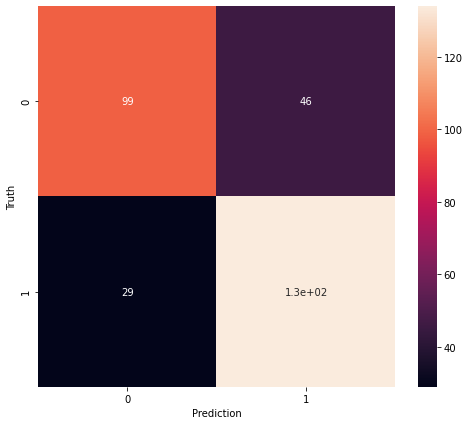

In [827]:
data_predict=model.predict(data_test)
cm= confusion_matrix(label_test,data_predict)
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [828]:
cm

array([[ 99,  46],
       [ 29, 134]], dtype=int64)

In [829]:
def print_confusion_matrix(label_test,data_predict):
    cm = confusion_matrix(label_test,data_predict)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
print_confusion_matrix(label_test,data_predict)

True positive =  99
False positive =  46
False negative =  29
True negative =  134


### 7.5) Validating test and score data

### 7.5.1) Test

In [830]:
pred=data_test.iloc[0]
model.predict([pred])

array([1], dtype=int64)

In [831]:
pred=data_test.iloc[1]
model.predict([pred])

array([0], dtype=int64)

In [832]:
pred=data_test.iloc[2]
model.predict([pred])

array([1], dtype=int64)

In [846]:
label_test.head(3)

365    1
737    0
10     1
957    0
Name: target, dtype: int64

### 7.5.2) Score

In [842]:
pred=data_11.iloc[0]
model.predict([pred])

array([0], dtype=int64)

In [843]:
pred=data_11.iloc[1]
model.predict([pred])

array([1], dtype=int64)

In [844]:
pred=data_11.iloc[2]
model.predict([pred])

array([0], dtype=int64)